Available datasets:
	Allosteric_Pyramid_Full_Fall22,
	restart_bad_trajs.sh,
	Allosteric_Pyramid_Partial_Fall22,
	AlloSolidCube_X5_4_12Dec22,
	AlloSolidCube_X5_1_12Dec22,
	AlloSolidCube_X3_Singlet_12Dec22,
	check_traj_sizes.sh,
	Wereflamingo_X2,
	NoAlloPyramid_14Oct22,
	AlloPyramid_X4_14Mar23,
	jobinfo.txt,
	AlloSolidCube_X1_12Dec22,
	Wereflamingo_X4,
	Wereflamingo_X3,
	WTSolidCube_Minimal_JB


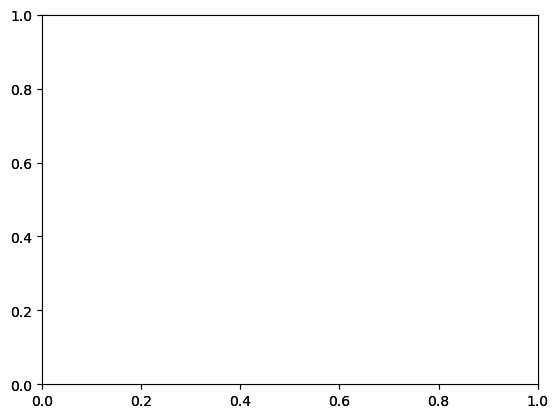

In [1]:
from input_output import *
from functools import reduce
import altair as alt
print("Available datasets:\n\t" + ',\n\t'.join(os.listdir(sims_root())))

In [29]:
### Readability ### 
# make sure the order is the same as dataset_names!!!!
results_name = "Wereflamingo_X4"
results = choose_results(results_name)
sample_every = 1

In [30]:
data = results.get_all_sizes().reset_index()
data

,index,timepoint,total_size,group,nt,temp,duplicate
0,0,0,0,HUMAN,0,0.01,0
1,1,10,100,HUMAN,0,0.01,0
2,2,20,101,HUMAN,0,0.01,0
3,3,30,104,HUMAN,0,0.01,0
4,4,40,105,HUMAN,0,0.01,0
...,...,...,...,...,...,...,...
283,1,10,0,NEITHE,0,0.05,3
284,2,20,0,NEITHE,0,0.05,3
285,3,30,0,NEITHE,0,0.05,3
286,4,40,0,NEITHE,0,0.05,3


In [31]:
# tmax = 8 * sample_every # pretty arbitrary, subject to review. 

In [32]:
# data = data[data["timepoint"] <= tmax]

In [33]:
data["time"] = data["timepoint"] * OXDNA_PRINT_CLUSTERS_EVERY / 1e6 # convert to megasteps

In [34]:
nt = 0

df = data[data["nt"] == nt]

ymax = data["total_size"].max()

df = df[df['temp']==0.01]

gb = df.groupby(["group", "time"])
avgs = gb.mean()
avgs["size_min"] = gb.min()['total_size']
avgs["size_max"] = gb.max()['total_size']
avgs["size_stdev"] = gb.std()['total_size'].fillna(0)
avgs = avgs.drop(["duplicate"], axis=1)
df = avgs.reset_index()

In [23]:
df

,group,time,index,timepoint,total_size,nt,temp,size_min,size_max,size_stdev
0,FLAMINGO,0.0,0.0,0.0,0.00,0.0,0.01,0,0,0.000000
1,FLAMINGO,100.0,1.0,10.0,110.50,0.0,0.01,109,112,1.290994
2,FLAMINGO,200.0,2.0,20.0,110.75,0.0,0.01,109,112,1.258306
3,FLAMINGO,300.0,3.0,30.0,110.75,0.0,0.01,109,112,1.258306
4,FLAMINGO,400.0,4.0,40.0,110.75,0.0,0.01,109,112,1.258306
5,FLAMINGO,500.0,5.0,50.0,110.75,0.0,0.01,109,112,1.258306
6,HUMAN,0.0,0.0,0.0,0.00,0.0,0.01,0,0,0.000000
7,HUMAN,100.0,1.0,10.0,110.50,0.0,0.01,109,112,1.290994
8,HUMAN,200.0,2.0,20.0,110.75,0.0,0.01,110,112,0.957427
9,HUMAN,300.0,3.0,30.0,110.75,0.0,0.01,110,112,0.957427


In [36]:
chart = alt.Chart(df);
chart = chart.mark_line().encode(
    x=alt.X('time:Q', title="Time (megasteps)", axis=alt.Axis(tickCount=5)),
    y=alt.Y('total_size:Q', title="Total Assembly Size", scale=alt.Scale(domain=(0,ymax))),
    color=alt.Color('group:O', scale=alt.Scale(scheme="accent"), title="Rule")
    # strokeDash=alt.Stroke('temp', title="Temperature")
) + chart.mark_area(opacity=0.25).encode(
    x=alt.X("time:Q", axis=alt.Axis(tickCount=5)),
    y="size_min:Q",
    y2="size_max:Q",
    color=alt.Color('group:O', scale=alt.Scale(scheme="accent"), title="Dataset")
)
chart = chart.properties(title=f"Patchy Interaction Rates of {results_name}")
chart = chart.configure_axis(
    labelFontSize=18,
    titleFontSize=20
).configure_title(fontSize=24)
chart.configure_legend(
        labelFontSize=18,
    titleFontSize=20
)

/home/jrevan21/.conda/envs/polycubes2/lib/python3.10/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [37]:
len([[0,4,3,5],[0,5,5,4],[1,4,5,5],[1,5,2,4],[4,0,5,1],[5,0,8,1],[5,2,6,3],[6,2,7,3],[8,3,9,2],[9,3,10,2],[10,0,11,1],[12,5,13,4],[13,5,14,4],[14,2,19,3],[14,3,17,2],[14,5,15,4],[15,5,16,4],[17,3,18,2],[19,2,20,3],[20,4,21,5],[20,5,22,4],[21,2,24,3],[22,2,23,3]])

23